<a href="https://colab.research.google.com/github/adyaomnkar/Deep_learning_with_python/blob/main/Basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import torch as th
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [3]:
df=sns.load_dataset('iris')

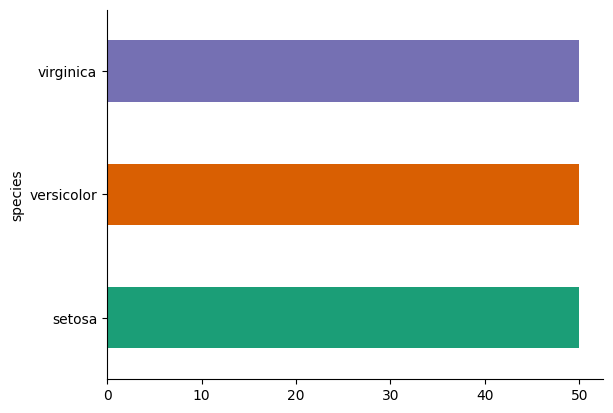

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# create a Model Class that inherits nn.Module
class Model(nn.Module):
  #input layer (with 4 features )--> Hidden layer1(number of neurons)-->H2(n)-->Output(3 classes of flowers)
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()#instanciate our nn.Module
        self.fc1=nn.Linear(in_features,h1) #starts from input->h1
        self.fc2=nn.Linear(h1,h2)# h1->h2
        self.out=nn.Linear(h2,out_features)#h2->output

    def forward(self,x):
        x=F.relu(self.fc1(x))#rectified linear unit
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x



In [6]:
#pick a manual seed for randomisation
th.manual_seed(41)
#Create an instance of the model
model=Model()


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

100%|██████████| 3.60k/3.60k [00:00<00:00, 496kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [9]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [10]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
#change from number to integers
my_df['species']=my_df['species'].replace('Setosa',0.0)
my_df['species']=my_df['species'].replace('Versicolor',1.0)
my_df['species']=my_df['species'].replace('Virginica',2.0)

In [13]:
import pandas as pd

In [14]:
# Replace all species values in one step
my_df['species'] = my_df['species'].replace({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0})


In [15]:
print(my_df['species'].unique())


['setosa' 'versicolor' 'virginica']


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'species' column
my_df['species'] = label_encoder.fit_transform(my_df['species'])

# Check the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [17]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
#train test split
X=my_df.drop('species',axis=1)
y=my_df['species']


In [19]:
#Extract as numpy arrays
y=y.values

In [20]:
#Extract as numpy arrays
X=X.values

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [24]:
#Convert features to Tensors
X_train=th.FloatTensor(X_train)
X_test=th.FloatTensor(X_test)


In [25]:
y_train=th.LongTensor(y_train)
y_test=th.LongTensor(y_test)

In [26]:
#set the criteria to measure the error
criterian=nn.CrossEntropyLoss()
#choose a adam optimiser ,lr=learning rate(if error doesn't go down after bunch of iterations(ephoc))
optimizer=th.optim.Adam(model.parameters(),lr=0.01)
model.parameters


<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [27]:
# Train our Model
# Epochs? (one run through all the training data)
epochs=100
losses=[]
for i in range(epochs):
  # Go forward and get a prediction
  y_pred=model.forward(X_train) #get predicted

  #measure the loss/error,gonna high at first
  loss=criterian(y_pred,y_train)#predicted vs y_train

  #keeo track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch

  if i% 10==0:
    print(f'Epoch: {i} and loss : {loss}')


  #Do some back propagation
  #take the error rate of forward propagation and feed it back through the network to fine tune the weigths .
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss : 1.1251550912857056
Epoch: 10 and loss : 1.0096259117126465
Epoch: 20 and loss : 0.8157405853271484
Epoch: 30 and loss : 0.585706353187561
Epoch: 40 and loss : 0.3999636471271515
Epoch: 50 and loss : 0.26768800616264343
Epoch: 60 and loss : 0.17942361533641815
Epoch: 70 and loss : 0.12151690572500229
Epoch: 80 and loss : 0.0860118493437767
Epoch: 90 and loss : 0.06520850956439972


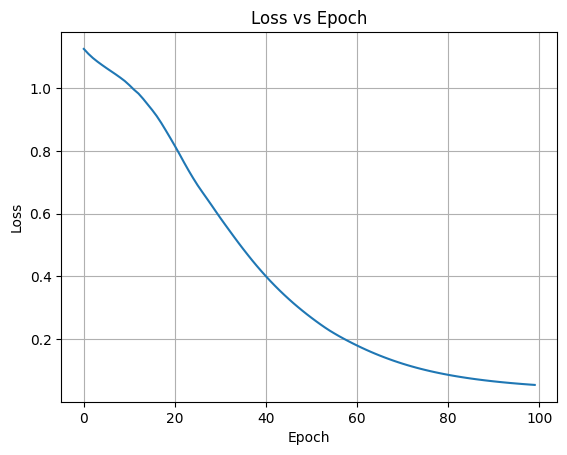

In [28]:
#graph the losses
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs Epoch')
plt.grid(True)

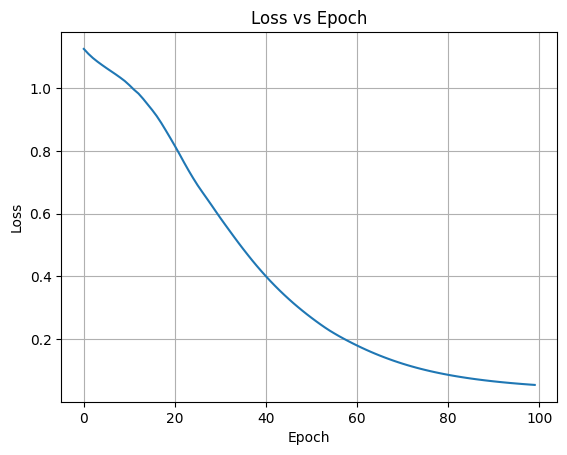

In [29]:
#before
#epoch =200
#graph the losses
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs Epoch')
plt.grid(True)

## Evaluate the Model with test data

In [30]:
with th.no_grad():#turns off back propagation
  y_eval=model.forward(X_test) #X_test are features and y_eval will be the predictions
  loss=criterian(y_eval,y_test)#find loss or error



In [31]:
loss


tensor(0.1315)

In [34]:
correct=0
with th.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    if y_test[i]==0:
      x='Setosa'
    elif y_test[i]==1:
      x='Versicolor'
    else:
      x='Virginica'

    #will tel us what type of flower class our network our model thinks
    # print(f'{i+1:2}. {str(data.numpy()):25} {y_val.argmax().item():<10}')
    print(f'{i+1}.){str(y_val)}\t{y_test[i]} \t {x} {y_val.argmax().item()}')


    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
    print(f'\n{correct}/{len(y_test)} correct')


1.)tensor([-5.8760,  4.4628,  6.5124])	2 	 Virginica 2

1/30 correct
2.)tensor([-7.5436,  4.1670,  9.7255])	2 	 Virginica 2

2/30 correct
3.)tensor([-8.4504,  5.1271, 10.1987])	2 	 Virginica 2

3/30 correct
4.)tensor([-4.3398,  5.6267,  2.5608])	1 	 Versicolor 1

4/30 correct
5.)tensor([-7.1825,  4.8754,  8.2992])	2 	 Virginica 2

5/30 correct
6.)tensor([-3.3974,  5.3463,  1.2803])	1 	 Versicolor 1

6/30 correct
7.)tensor([-5.9231,  4.9822,  5.9997])	2 	 Virginica 2

7/30 correct
8.)tensor([-4.2881,  5.7003,  2.3889])	1 	 Versicolor 1

8/30 correct
9.)tensor([-6.5356,  4.9257,  7.1260])	2 	 Virginica 2

9/30 correct
10.)tensor([-8.0509,  4.4129, 10.3286])	2 	 Virginica 2

10/30 correct
11.)tensor([-5.6762,  4.9500,  5.6215])	2 	 Virginica 2

11/30 correct
12.)tensor([ 4.5662, -2.2476, -2.8911])	0 	 Setosa 0

12/30 correct
13.)tensor([ 4.2571, -1.9967, -2.7330])	0 	 Setosa 0

13/30 correct
14.)tensor([-2.1108,  4.0515,  0.5799])	1 	 Versicolor 1

14/30 correct
15.)tensor([ 3.4575, -1.20

### ***Evaluate with New data***

> Add blockquote



In [39]:
new_iris=th.tensor([-4.6514,  5.7776,  2.9273,1.32])

In [40]:
with th.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([ 0.7854,  1.2040, -1.0931])
1


In [41]:
#Save our Model
th.save(model.state_dict(),'basic_first_neural_network.pt')

In [42]:
#load the saved model
new_model=Model()
new_model.load_state_dict(th.load('basic_first_neural_network.pt'))

<ipython-input-42-18671319075a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(th.load('basic_first_neural_network.pt'))


<All keys matched successfully>

In [43]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)